In [593]:
# เรียกใช้ข้อมูล
import pandas as pd
import numpy as np
from sklearn.datasets import load_files

Titanic_data = 'Titanic/train.csv' # เก็บชื่อที่อยู่ไฟล์
cols = ['Name', 'survived'] # คอลัมน์ที่ต้องการใช้
df = pd.read_csv(Titanic_data) # โหลดไฟล์
df.head(19) # preview


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [594]:
X = df.Name # สำหรับ features

In [595]:
len(X)

891

In [596]:
# import library
from nltk.tokenize import WhitespaceTokenizer
Features = []
name = []
tokenized_lists = []
for i in range(len(X)):
  tokenized_lists.append((X[i], WhitespaceTokenizer(), i))

In [597]:
X.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [598]:
tokenized_lists[:3]

[('Braund, Mr. Owen Harris',
  WhitespaceTokenizer(pattern='\\s+', gaps=True, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>),
  0),
 ('Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
  WhitespaceTokenizer(pattern='\\s+', gaps=True, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>),
  1),
 ('Heikkinen, Miss. Laina',
  WhitespaceTokenizer(pattern='\\s+', gaps=True, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>),
  2)]

In [599]:
results = []
names = []
X = X
for name, tokenized, i in tokenized_lists:
    tokenized_list = tokenized.tokenize(X[i]) 
    names.append(name) # เอาตัวแปร name ไปเก็บชื่อโมเดลจาก models  
    results.append(tokenized_list) # เอาผล cvs ที่คำนวณได้เก็บไว้ใน results
    '''print('{} {} '.format(name, tokenized_list))'''  # แสดงคำที่ยังไม่ตัด + ตัดแล้ว

In [600]:
results[0] # ดูชื่อแรก

['Braund,', 'Mr.', 'Owen', 'Harris']

In [601]:
df_text =pd.DataFrame(results) # บันทึกเก็บไว้ใน DataFrame

In [602]:

df_text.isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,False,False,False,False,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,True,True,True,True,True,True,True
2,False,False,False,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,True,True,True,True,True,True,True
4,False,False,False,False,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,True,True,True,True,True,True,True,True,True,True,True
887,False,False,False,False,True,True,True,True,True,True,True,True,True,True
888,False,False,False,False,False,True,True,True,True,True,True,True,True,True
889,False,False,False,False,True,True,True,True,True,True,True,True,True,True


In [603]:

# กำจัด None ด้วยการแทน str : ' '
for i in range(len(df_text.columns)):
  df_text[i] = df_text[i].fillna(' ')

# ดู prefix name (คำนำหน้าชื่อ) หาคำที่ตัดได้ทั้งหมด
df_text[1].unique() # จะเห็นว่าบางชื่อยังตัดได้ไม่ดี ยังมีกลุ่มคำที่ไม่ใช่คำนำหน้าชื่ออยู๋

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,'], dtype=object)

In [604]:
len(df_text.columns)
df_text.head(19)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"Braund,",Mr.,Owen,Harris,,,,,,,,,,
1,"Cumings,",Mrs.,John,Bradley,(Florence,Briggs,Thayer),,,,,,,
2,"Heikkinen,",Miss.,Laina,,,,,,,,,,,
3,"Futrelle,",Mrs.,Jacques,Heath,(Lily,May,Peel),,,,,,,
4,"Allen,",Mr.,William,Henry,,,,,,,,,,
5,"Moran,",Mr.,James,,,,,,,,,,,
6,"McCarthy,",Mr.,Timothy,J,,,,,,,,,,
7,"Palsson,",Master.,Gosta,Leonard,,,,,,,,,,
8,"Johnson,",Mrs.,Oscar,W,(Elisabeth,Vilhelmina,Berg),,,,,,,
9,"Nasser,",Mrs.,Nicholas,(Adele,Achem),,,,,,,,,


In [605]:
# prefix name ที่ถูกต้องเก็บไว้
list_PreName = ['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.', 'Ms.', 'Major.', 'Mlle.', 'Col.', 'Capt.', 'Jonkheer.'] # เลือกมาเฉพาะคำนำหน้าที่มี .

In [606]:
idx_unknown = df_text[1].loc[(df_text[1] =='Don.')|(df_text[1] =='Rev.')|(df_text[1] =='Mme.')|(df_text[1] =='Major')|(df_text[1] =='Mlle.')|(df_text[1] =='Col.') | (df_text[1] =='Capt.') | (df_text[1] =='Jonkheer.')] 

In [607]:
# ตรวจคำนำหน้าชื่อที่เราไม่รู้จัก Don. , Rev. , Mme. ,Major. , Mlle. , Col. , Capt. , Jonkheer. 
df_text.loc[idx_unknown.index] # ที่อยู่คำนำหน้าชื่อที่ไม่รู้จัก,แสดงคำนำหน้าชื่อที่เราไม่รู้จัก

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
30,"Uruchurtu,",Don.,Manuel,E,,,,,,,,,,
149,"Byles,",Rev.,Thomas,Roussel,Davids,,,,,,,,,
150,"Bateman,",Rev.,Robert,James,,,,,,,,,,
249,"Carter,",Rev.,Ernest,Courtenay,,,,,,,,,,
369,"Aubart,",Mme.,Leontine,Pauline,,,,,,,,,,
626,"Kirkland,",Rev.,Charles,Leonard,,,,,,,,,,
641,"Sagesser,",Mlle.,Emma,,,,,,,,,,,
647,"Simonius-Blumer,",Col.,Oberst,Alfons,,,,,,,,,,
694,"Weir,",Col.,John,,,,,,,,,,,
710,"Mayne,",Mlle.,Berthe,Antonine,"(""Mrs",de,"Villiers"")",,,,,,,


In [608]:


# index คำที่ตัดผิดตำแหน่ง 'Planke,' | 'Billiard,' | 'Walle,' | 'Pelsmaeker,' | 'Mulder,' | 'y' |'Steen,' | 'Carlo,' | 'Impe,'|'Gordon,' | 'Messemaeker,' | 'Velde,' |  'the' | 'Shawah,' | 'Melkebeke,' | 'Cruyssen,'
idx_fail = df_text[1].loc[
                          (df_text[1]=='Planke,')        | (df_text[1]=='Billiard,') |  (df_text[1] =='Walle,')|
                          (df_text[1]=='Pelsmaeker,') | (df_text[1]=='Mulder')  |  (df_text[1] =='y') | 
                          (df_text[1]=='Steen,')         | (df_text[1]=='Carlo,')    |  (df_text[1] =='Impe,')|
                          (df_text[1]=='Gordon,')       | (df_text[1]=='Messemaeker,' ) |
                          (df_text[1]=='Velde,') | (df_text[1]=='the') | (df_text[1]=='Shawah,')
                          ] 

In [609]:
X = df_text.loc[idx_fail.index]
X # จะเห็นคำนำหน้าที่ไม่รู้จักเพิ่ม คือ the Countess.	, Sir. , Lady.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
18,Vander,"Planke,",Mrs.,Julius,(Emelia,Maria,Vandemoortele),,,,,,,
38,Vander,"Planke,",Miss.,Augusta,Maria,,,,,,,,,
153,van,"Billiard,",Mr.,Austin,Blyler,,,,,,,,,
200,Vande,"Walle,",Mr.,Nestor,Cyriel,,,,,,,,,
282,de,"Pelsmaeker,",Mr.,Alfons,,,,,,,,,,
307,Penasco,y,"Castellana,",Mrs.,Victor,de,Satode,(Maria,Josefa,Perez,de,Soto,y,Vallejo)
333,Vander,"Planke,",Mr.,Leo,Edmondus,,,,,,,,,
355,Vanden,"Steen,",Mr.,Leo,Peter,,,,,,,,,
361,del,"Carlo,",Mr.,Sebastiano,,,,,,,,,,
419,Van,"Impe,",Miss.,Catharina,,,,,,,,,,


In [610]:
# เพิ่ม 'Sir' , 'Lady' ลงไปด้วยใน list_Prename
list_special_prename = ['Sir.', 'Lady.']
for i in list_special_prename:
  list_PreName.append(i)


for i in idx_fail.index:
  for j in list_PreName:
    if (df_text[2].loc[i] == j):
      df_text[0].loc[i] = df_text[0].loc[i]+' '+df_text[1].loc[i]# รวมคอลัมน์ 0, 1
      df_text[1].loc[i] = j                 # แทนที่คอลัมน์ 1 ด้วยคอลัมน์ 2

    elif df_text[2].loc[i] == 'Countess.':                              
      df_text[1].loc[i] = 'the Countess.' # แทนที่ the ด้วย 'the Countess.'

    elif df_text[3].loc[i] == j:
      df_text[0].loc[i] = df_text[0].loc[i]+' '+df_text[1].loc[i]+' '+ df_text[2].loc[i]                  # รวมคอลัมน์ 0, 1, 2
      df_text[1].loc[i] = j          # แทนที่คอลัมน์ 2 ด้วยคอลัมน์ 3
    

  

In [611]:
#=  df_text[3].loc[18]+' '+ df_text[4].loc[18]+ ' ' + df_text[5].loc[18] + ' ' + df_text[6].loc[18] + ' ' 

In [612]:
df_text.loc[idx_fail.index] 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
18,"Vander Planke,",Mrs.,Mrs.,Julius,(Emelia,Maria,Vandemoortele),,,,,,,
38,"Vander Planke,",Miss.,Miss.,Augusta,Maria,,,,,,,,,
153,"van Billiard,",Mr.,Mr.,Austin,Blyler,,,,,,,,,
200,"Vande Walle,",Mr.,Mr.,Nestor,Cyriel,,,,,,,,,
282,"de Pelsmaeker,",Mr.,Mr.,Alfons,,,,,,,,,,
307,"Penasco y Castellana,",Mrs.,"Castellana,",Mrs.,Victor,de,Satode,(Maria,Josefa,Perez,de,Soto,y,Vallejo)
333,"Vander Planke,",Mr.,Mr.,Leo,Edmondus,,,,,,,,,
355,"Vanden Steen,",Mr.,Mr.,Leo,Peter,,,,,,,,,
361,"del Carlo,",Mr.,Mr.,Sebastiano,,,,,,,,,,
419,"Van Impe,",Miss.,Miss.,Catharina,,,,,,,,,,


In [613]:
df_text.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"Braund,",Mr.,Owen,Harris,,,,,,,,,,
1,"Cumings,",Mrs.,John,Bradley,(Florence,Briggs,Thayer),,,,,,,
2,"Heikkinen,",Miss.,Laina,,,,,,,,,,,
3,"Futrelle,",Mrs.,Jacques,Heath,(Lily,May,Peel),,,,,,,
4,"Allen,",Mr.,William,Henry,,,,,,,,,,


In [614]:
list_PreName

['Mr.',
 'Mrs.',
 'Miss.',
 'Master.',
 'Don.',
 'Rev.',
 'Dr.',
 'Mme.',
 'Ms.',
 'Major.',
 'Mlle.',
 'Col.',
 'Capt.',
 'Jonkheer.',
 'Sir.',
 'Lady.']

In [615]:
for i in df_text.index:
  for j in list_PreName:
    

    
    # กรณีคอลัมน์ 1 = list_PreName , คอลัมน์ 2 = list_PreName
    if (df_text[1].loc[i]==j) & (df_text[2].loc[i]==j):
      df_text[2].loc[i] = ''
      k = 2
      for k in range(len(df_text.loc[i])-3):
        df_text[2].loc[i] += df_text[k+3].loc[i] + ' '
        

    # กรณีคอลัมน์ 1 = list_PreName , คอลัมน์ 3 = list_PreName    
    elif (df_text[1].loc[i]==j) & (df_text[2].loc[i]!=j) &(df_text[3].loc[i]==j):
      df_text[2].loc[i] = ''
      df_text[3].loc[i] = ''
      k = 2
      for k in range(len(df_text.loc[i])-2):
        df_text[2].loc[i] += df_text[k+2].loc[i] + ' '

    # ทั่วไป กรณีคอลัมน์ 1 = list_PreName   
    elif (df_text[1].loc[i]==j) & (df_text[2].loc[i]!=j) &(df_text[3].loc[i]!=j):
      k = 2
      for k in range(len(df_text.loc[i])-3):
        df_text[2].loc[i] += ' ' + df_text[k+3].loc[i]

        
  # กรณีคำนำหน้าเป็น 'the Countess.'   
  if (df_text[1].loc[i]== 'the Countess.'):
    k = 2
    df_text[2].loc[i] = ' '
    for k in range(len(df_text.loc[i])-2):
      df_text[2].loc[i] += ' ' + df_text[k+2].loc[i]
        


In [616]:
df_text.loc[idx_fail.index] # ตรวจดูคำนำหน้าสำหรับหรับจุดที่ผิดเพี้ยน (2กรณี)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
18,"Vander Planke,",Mrs.,Julius (Emelia Maria Vandemoortele) ...,Julius,(Emelia,Maria,Vandemoortele),,,,,,,
38,"Vander Planke,",Miss.,Augusta Maria,Augusta,Maria,,,,,,,,,
153,"van Billiard,",Mr.,Austin Blyler,Austin,Blyler,,,,,,,,,
200,"Vande Walle,",Mr.,Nestor Cyriel,Nestor,Cyriel,,,,,,,,,
282,"de Pelsmaeker,",Mr.,Alfons,Alfons,,,,,,,,,,
307,"Penasco y Castellana,",Mrs.,Victor de Satode (Maria Josefa Perez de Soto...,,Victor,de,Satode,(Maria,Josefa,Perez,de,Soto,y,Vallejo)
333,"Vander Planke,",Mr.,Leo Edmondus,Leo,Edmondus,,,,,,,,,
355,"Vanden Steen,",Mr.,Leo Peter,Leo,Peter,,,,,,,,,
361,"del Carlo,",Mr.,Sebastiano,Sebastiano,,,,,,,,,,
419,"Van Impe,",Miss.,Catharina,Catharina,,,,,,,,,,


In [617]:
df_text[2].loc[18] # กรณี 1 ตัดแล้ว PreName อยู่คอลัมน์ 2

'Julius (Emelia Maria Vandemoortele)               '

In [618]:
df_text[2].loc[307] # กรณี 2 ตัดแล้ว PreName อยู่คอลัมน์ 3

'  Victor de Satode (Maria Josefa Perez de Soto y Vallejo) '

In [619]:
df_text[2].loc[0] # กรณี 3 ตัดได้ดีแล้ว ตัดแล้ว PreName อยู่คอลัมน์ 1

'Owen Harris                    '

In [620]:
df_text[2].loc[759] # กรณี 4 พิเศษ 	the Countess.

'    of (Lucy Noel Martha Dyer-Edwards)            '

In [621]:
df_text.head(19) # สำหรับที่ตัดดีแล้ว

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"Braund,",Mr.,Owen Harris,Harris,,,,,,,,,,
1,"Cumings,",Mrs.,John Bradley (Florence Briggs Thayer) ...,Bradley,(Florence,Briggs,Thayer),,,,,,,
2,"Heikkinen,",Miss.,Laina,,,,,,,,,,,
3,"Futrelle,",Mrs.,Jacques Heath (Lily May Peel),Heath,(Lily,May,Peel),,,,,,,
4,"Allen,",Mr.,William Henry,Henry,,,,,,,,,,
5,"Moran,",Mr.,James,,,,,,,,,,,
6,"McCarthy,",Mr.,Timothy J,J,,,,,,,,,,
7,"Palsson,",Master.,Gosta Leonard,Leonard,,,,,,,,,,
8,"Johnson,",Mrs.,Oscar W (Elisabeth Vilhelmina Berg),W,(Elisabeth,Vilhelmina,Berg),,,,,,,
9,"Nasser,",Mrs.,Nicholas (Adele Achem),(Adele,Achem),,,,,,,,,


In [622]:
df_text[2].loc[18]

'Julius (Emelia Maria Vandemoortele)               '

In [623]:
# เก็บส่วนที่จะนำมาทำ Features
df_text['last_name'] = df_text[0]
df_text['prefix_name'] = df_text[1]
df_text['name'] = df_text[2]

In [624]:
# เลือก features ที่จะนำมาใช้
cols = ['last_name', 'prefix_name', 'name']
X_features = df_text[cols]

In [625]:
X_features.head() # name นำไปแยก features ต่อ
X_features.last_name[2]

'Heikkinen,'

In [626]:
# ตัดคำสำหรับนับจำนวนคำ last_name โดยใช้ len 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from  sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer() # กำหนดให้ตัด Stop-words ออกไป
count_word_LastName = []
for i in X_features.index:
  text = X_features.last_name[i]
  text_list = [text]
  words = tfv.fit_transform(text_list)
  text_cut = tfv.get_feature_names()
  count_word_LastName.append(len(text_cut)) 
        
df_count_word_LastName = pd.DataFrame(count_word_LastName, columns=['count_word_LastName'])
X_features['count_word_LastName'] = df_count_word_LastName.count_word_LastName

In [627]:
X_features.sample(20)

,last_name,prefix_name,name,count_word_LastName
695,"Chapman,",Mr.,Charles Henry,1
569,"Jonsson,",Mr.,Carl,1
888,"Johnston,",Miss.,"Catherine Helen ""Carrie""",1
176,"Lefebre,",Master.,Henry Forbes,1
769,"Gronnestad,",Mr.,Daniel Danielsen,1
772,"Mack,",Mrs.,(Mary),1
530,"Quick,",Miss.,Phyllis May,1
804,"Hedman,",Mr.,Oskar Arvid,1
228,"Fahlstrom,",Mr.,Arne Jonas,1
8,"Johnson,",Mrs.,Oscar W (Elisabeth Vilhelmina Berg),1


In [628]:
# โค้ด python function สำหรับนับพยางค์
import re
def syllables(word) :
    word = word.lower()

    # exception_add are words that need extra syllables
    # exception_del are words that need less syllables

    exception_add = ['serious','crucial']
    exception_del = ['fortunately','unfortunately']

    co_one = ['cool','coach','coat','coal','count','coin','coarse','coup','coif','cook','coign','coiffe','coof','court']
    co_two = ['coapt','coed','coinci']

    pre_one = ['preach']

    syls = 0 #added syllable number
    disc = 0 #discarded syllable number

    #1) if letters < 3 : return 1
    if len(word) <= 3 :
        syls = 1
        return syls

    #2) if doesn't end with "ted" or "tes" or "ses" or "ied" or "ies", discard "es" and "ed" at the end.
    # if it has only 1 vowel or 1 set of consecutive vowels, discard. (like "speed", "fled" etc.)

    if word[-2:] == "es" or word[-2:] == "ed" :
        doubleAndtripple_1 = len(re.findall(r'[eaoui][eaoui]',word))
        if doubleAndtripple_1 > 1 or len(re.findall(r'[eaoui][^eaoui]',word)) > 1 :
            if word[-3:] == "ted" or word[-3:] == "tes" or word[-3:] == "ses" or word[-3:] == "ied" or word[-3:] == "ies" :
                pass
            else :
                disc+=1

    #3) discard trailing "e", except where ending is "le"  

    le_except = ['whole','mobile','pole','male','female','hale','pale','tale','sale','aisle','whale','while']

    if word[-1:] == "e" :
        if word[-2:] == "le" and word not in le_except :
            pass

        else :
            disc+=1

    #4) check if consecutive vowels exists, triplets or pairs, count them as one.

    doubleAndtripple = len(re.findall(r'[eaoui][eaoui]',word))
    tripple = len(re.findall(r'[eaoui][eaoui][eaoui]',word))
    disc+=doubleAndtripple + tripple

    #5) count remaining vowels in word.
    numVowels = len(re.findall(r'[eaoui]',word))

    #6) add one if starts with "mc"
    if word[:2] == "mc" :
        syls+=1

    #7) add one if ends with "y" but is not surrouned by vowel
    if word[-1:] == "y" and word[-2] not in "aeoui" :
        syls +=1

    #8) add one if "y" is surrounded by non-vowels and is not in the last word.

    for i,j in enumerate(word) :
        if j == "y" :
            if (i != 0) and (i != len(word)-1) :
                if word[i-1] not in "aeoui" and word[i+1] not in "aeoui" :
                    syls+=1

    #9) if starts with "tri-" or "bi-" and is followed by a vowel, add one.

    if word[:3] == "tri" and word[3] in "aeoui" :
        syls+=1

    if word[:2] == "bi" and word[2] in "aeoui" :
        syls+=1

    #10) if ends with "-ian", should be counted as two syllables, except for "-tian" and "-cian"

    if word[-3:] == "ian" : 
    #and (word[-4:] != "cian" or word[-4:] != "tian") :
        if word[-4:] == "cian" or word[-4:] == "tian" :
            pass
        else :
            syls+=1

    #11) if starts with "co-" and is followed by a vowel, check if exists in the double syllable dictionary, if not, check if in single dictionary and act accordingly.

    if word[:2] == "co" and word[2] in 'eaoui' :

        if word[:4] in co_two or word[:5] in co_two or word[:6] in co_two :
            syls+=1
        elif word[:4] in co_one or word[:5] in co_one or word[:6] in co_one :
            pass
        else :
            syls+=1

    #12) if starts with "pre-" and is followed by a vowel, check if exists in the double syllable dictionary, if not, check if in single dictionary and act accordingly.

    if word[:3] == "pre" and word[3] in 'eaoui' :
        if word[:6] in pre_one :
            pass
        else :
            syls+=1

    #13) check for "-n't" and cross match with dictionary to add syllable.

    negative = ["doesn't", "isn't", "shouldn't", "couldn't","wouldn't"]

    if word[-3:] == "n't" :
        if word in negative :
            syls+=1
        else :
            pass   

    #14) Handling the exceptional words.

    if word in exception_del :
        disc+=1

    if word in exception_add :
        syls+=1     

    # calculate the output
    return numVowels - disc + syls

In [629]:
# ใช้ฟังก์ชันสำหรับนับ พยางค์ ของ last_name
import warnings
warnings.filterwarnings('ignore')

count_syllable_LastName = []
for i in X_features.index:
  count_syllable_LastName.append(syllables(X_features.last_name[i]))

X_features['count_syllable_LastName'] = np.array(count_syllable_LastName)

In [630]:
X_features.head(20)

,last_name,prefix_name,name,count_word_LastName,count_syllable_LastName
0,"Braund,",Mr.,Owen Harris,1,1
1,"Cumings,",Mrs.,John Bradley (Florence Briggs Thayer) ...,1,2
2,"Heikkinen,",Miss.,Laina,1,3
3,"Futrelle,",Mrs.,Jacques Heath (Lily May Peel),1,3
4,"Allen,",Mr.,William Henry,1,2
5,"Moran,",Mr.,James,1,2
6,"McCarthy,",Mr.,Timothy J,1,3
7,"Palsson,",Master.,Gosta Leonard,1,2
8,"Johnson,",Mrs.,Oscar W (Elisabeth Vilhelmina Berg),1,2
9,"Nasser,",Mrs.,Nicholas (Adele Achem),1,2


In [631]:
# ตัดคำสำหรับนับจำนวนคำ name โดยใช้ len 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from  sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer() # กำหนดให้ตัด Stop-words ออกไป
count_word_Name = []
for i in X_features.index:
  text = X_features.name[i]
  text_list = [text]
  words = tfv.fit_transform(text_list)
  text_cut = tfv.get_feature_names()
  count_word_Name.append(len(text_cut)) 
        
df_count_word_Name = pd.DataFrame(count_word_Name, columns=['count_word_Name'])
X_features['count_word_Name'] = df_count_word_Name.count_word_Name

In [632]:
# ใช้ฟังก์ชันสำหรับนับ พยางค์ สำหรับ name
import warnings
warnings.filterwarnings('ignore')
count_syllable_Name = []
for i in X_features.index:
  count_syllable_Name.append(syllables(X_features.name[i]))

df_count_syllable_Name = pd.DataFrame(count_syllable_Name, columns=['count_syllable_Name'])
X_features['count_syllable_Name'] = df_count_syllable_Name.count_syllable_Name

In [633]:
X_features

,last_name,prefix_name,name,count_word_LastName,count_syllable_LastName,count_word_Name,count_syllable_Name
0,"Braund,",Mr.,Owen Harris,1,1,2,4
1,"Cumings,",Mrs.,John Bradley (Florence Briggs Thayer) ...,1,2,5,9
2,"Heikkinen,",Miss.,Laina,1,3,1,2
3,"Futrelle,",Mrs.,Jacques Heath (Lily May Peel),1,3,5,7
4,"Allen,",Mr.,William Henry,1,2,2,4
...,...,...,...,...,...,...,...
886,"Montvila,",Rev.,Juozas,1,3,1,2
887,"Graham,",Miss.,Margaret Edith,1,2,2,5
888,"Johnston,",Miss.,"Catherine Helen ""Carrie""",1,2,3,8
889,"Behr,",Mr.,Karl Howell,1,1,2,3


In [634]:
#ทำ labelencoding สำหรับ X (input)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

def labelEncode(data, columns):
    for i in columns:
#         print(i)
        lb = LabelEncoder().fit_transform(data[i])
        data[i + '_'] = lb
        
columns =  ['prefix_name', 'count_word_LastName', 'count_syllable_LastName', 'count_word_Name', 'count_syllable_Name']
labelEncode(X_features, columns)

In [635]:
X_features.head()

,last_name,prefix_name,name,count_word_LastName,count_syllable_LastName,count_word_Name,count_syllable_Name,prefix_name_,count_word_LastName_,count_syllable_LastName_,count_word_Name_,count_syllable_Name_
0,"Braund,",Mr.,Owen Harris,1,1,2,4,13,0,0,1,3
1,"Cumings,",Mrs.,John Bradley (Florence Briggs Thayer) ...,1,2,5,9,14,0,1,4,8
2,"Heikkinen,",Miss.,Laina,1,3,1,2,10,0,2,0,1
3,"Futrelle,",Mrs.,Jacques Heath (Lily May Peel),1,3,5,7,14,0,2,4,6
4,"Allen,",Mr.,William Henry,1,2,2,4,13,0,1,1,3


In [636]:
# เลือก feature มาทำ normalization
col_sel = ['prefix_name_', 'count_word_LastName_', 'count_syllable_LastName_', 'count_word_Name_', 'count_syllable_Name_']
X_pp = X_features[col_sel]

In [637]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler as Scaler # Normalization 0-1 เพราะ Variance มีค่าต่างกันแต่ละตัวแปร
X = X_pp 
sc = Scaler()
X_sc = sc.fit_transform(X) # Normalization 0-1

df_sc = pd.DataFrame(X_sc, columns=X.columns) # เก็บ ที่ทำtransform แล้วลงในตัวแปร df_sc


In [638]:
y = df.Survived # สำหรับ class

In [639]:
df_sc.head(10).round(3)

,prefix_name_,count_word_LastName_,count_syllable_LastName_,count_word_Name_,count_syllable_Name_
0,0.65,0.0,0.000,0.167,0.200
1,0.70,0.0,0.167,0.667,0.533
2,0.50,0.0,0.333,0.000,0.067
3,0.70,0.0,0.333,0.667,0.400
4,0.65,0.0,0.167,0.167,0.200
5,0.65,0.0,0.167,0.000,0.067
6,0.65,0.0,0.333,0.000,0.133
7,0.40,0.0,0.167,0.167,0.200
8,0.70,0.0,0.167,0.500,0.667
9,0.70,0.0,0.167,0.333,0.467


# ทำ Bar plot เทียบแต่ละ Algorithm

In [640]:
# ทำการ import library สร้าง list model แล้ว loop ประเมินด้วย Cross Validation
# ทำการ import library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [641]:
# สร้าง list model
models = []
models.append(('LR', LogisticRegression()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('XGBT',XGBClassifier()))

In [642]:
#  loop ประเมินด้วย Cross Validation
from sklearn.model_selection import cross_val_score

results = []
names = []
X = df_sc
for name, model in models:
    cvs = cross_val_score(model, X, y, cv=10)
    names.append(name) # เอาตัวแปร name ไปเก็บชื่อโมเดลจาก models
    cvs = cross_val_score(model, X, y, cv=10) # ตัวแปร model เก็บค่ามาจาก models ลำดับที่ 2 เช่น naemeเก็บ'LR' และ model เก็บ LogisticRegression()
    results.append(cvs) # เอาผล cvs ที่คำนวณได้เก็บไว้ใน results
    print('{:4} {:.4f} ({:.3f})'.format(name, cvs.mean(), cvs.std())) 

LR   0.6836 (0.037)
kNN  0.7115 (0.057)
NB   0.6712 (0.033)
SVC  0.7464 (0.037)
RFC  0.7497 (0.023)
DT   0.7497 (0.030)
XGBT 0.7531 (0.031)


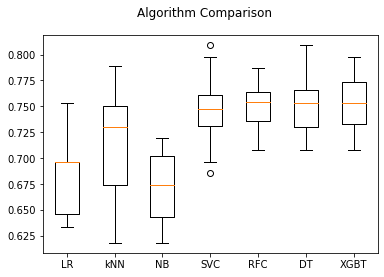

In [643]:
import matplotlib.pyplot as plt
# พล็อตกราฟ boxplot เพื่อเลือก Best of algorithm
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111) # row column id
plt.boxplot(results) # plot box plot
ax.set_xticklabels(names) # label ชื่อ แกน x
plt.show()

- Algorithm ที่ดีที่สุดจาก bar plot คือ RFC
- จาก bar plot การเลือกใช้ algorithm ควรใช้ RFC(ให้ cross val score :75.42%) 

# หาค่า parameter tuning ด้วย Grid Randomized

In [644]:
from sklearn.ensemble import RandomForestClassifier
from time import time
model_RFC = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=440, max_features='sqrt',
                       max_leaf_nodes=9, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)  # n_estimators = จำนวนต้นไม้ที่ต้องการสร้าง
start = time() # เวลาเริ่มต้น train
model_RFC.fit(X, y) # Train สร้าง model
finish_RFC = time() -start
print('{:.5f} sec'.format(finish_RFC)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_RFC, X, y, cv=10) # k=5
cvs_RFC = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))
print('Time {:.4f} s'.format(finish_RFC))

0.26802 sec
Cross val scores [0.7778 0.809  0.7303 0.8652 0.7865 0.7865 0.7753 0.7303 0.7865 0.7528]
mean 78.0025 %
Time 0.2680 s


# Save Model

In [645]:
from sklearn.externals import joblib

# save model RFC_The_best_model
joblib.dump(model_RFC,'RFC_The_best_model.pkl')

['RFC_The_best_model.pkl']